# 1) AED 1 

### 1) Carga de datos

In [4]:
import pandas as pd

data = pd.read_csv("../data/customer_dataset.csv", sep=",")

data

,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionAmount,transactionFailed,fraudulent,emailProvider,emailDomain,customerIPAddressSimplified,sameCity
0,18.0,pending,True,card,JCB 16 digit,Citizens First Banks,18,False,False,yahoo,com,only_letters,yes
1,26.0,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,26,False,True,yahoo,com,only_letters,no
2,45.0,fulfilled,False,card,VISA 16 digit,Vertex Bancorp,45,False,False,yahoo,com,digits_and_letters,no
3,23.0,fulfilled,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.,23,False,False,yahoo,com,digits_and_letters,no
4,43.0,fulfilled,False,card,Mastercard,Vertex Bancorp,43,True,True,other,com,only_letters,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,NaN,NaN,NaN,NaN,NaN,NaN,25,True,NaN,weird,weird,only_letters,unknown
619,NaN,NaN,NaN,NaN,NaN,NaN,25,True,NaN,weird,weird,only_letters,unknown
620,NaN,NaN,NaN,NaN,NaN,NaN,25,False,NaN,weird,weird,only_letters,unknown
621,NaN,NaN,NaN,NaN,NaN,NaN,19,False,NaN,weird,weird,only_letters,unknown


In [5]:
from funpymodeling import status

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderAmount,145,0.232745,0,0.000000,67,float64
1,orderState,145,0.232745,0,0.000000,3,object
2,paymentMethodRegistrationFailure,281,0.451043,302,0.484751,2,object
3,paymentMethodType,281,0.451043,0,0.000000,4,object
4,paymentMethodProvider,281,0.451043,0,0.000000,10,object
5,paymentMethodIssuer,281,0.451043,0,0.000000,20,object
6,transactionAmount,0,0.000000,0,0.000000,67,int64
7,transactionFailed,0,0.000000,455,0.730337,2,bool
8,fraudulent,455,0.730337,107,0.171750,2,object
9,emailProvider,0,0.000000,0,0.000000,5,object


### 2) Analisis de la variable "paymentMethodType" (categorica)

Visualizamos la variable graficamente a traves de SEABORN

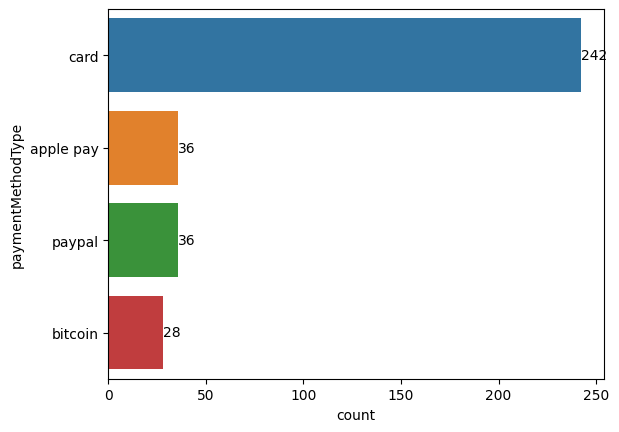

In [6]:
import seaborn as sns

ax = sns.countplot(y=data['paymentMethodType'], order=data['paymentMethodType'].value_counts().index)

# el for sirve para colocar la cantidad en cada contenedor (barra)
for label in ax.containers:
    ax.bar_label(label)


Visualizamos la variable 'paymentMethodType' a traves de la funcion 'freq_tbl' de funpymodeling. 
Que nos permite conocer la cantidad de veces que aparece una categoria *(frequency)*, el porcentaje que representa en esa categoria *(percentage)* y el porcentaje acumulado respecto de las variables listadas *(cumulative_perc)*



In [7]:
from funpymodeling import freq_tbl

freq_tbl(data['paymentMethodType'])

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


Análsis a través de una Query:

In [8]:
#Guardamos la variable a analizar 
metodo_pago = freq_tbl(data['paymentMethodType'])

#_De la siguiente forma podemos solicitar que de la columna 'paymentMethodType' nos traiga todos los elementos
# que sean menores o iguales a 30.
metodo_pago.query("frequency<=30")


,paymentMethodType,frequency,percentage,cumulative_perc
3,bitcoin,28,0.044944,1.0


In [9]:
#_Pero con esta otra sentencia indicamos que solo nos traiga la columna específica que cumpla con la condición.
# (filtramos aun mas la consulta), ingorando la información extra que pueda proporcionarnos (prefiero la anterior)
metodo_pago.query("frequency<=30")['paymentMethodType']

3    bitcoin
Name: paymentMethodType, dtype: object

# 2) AED 2

### 1) Análisis de variables categóricas

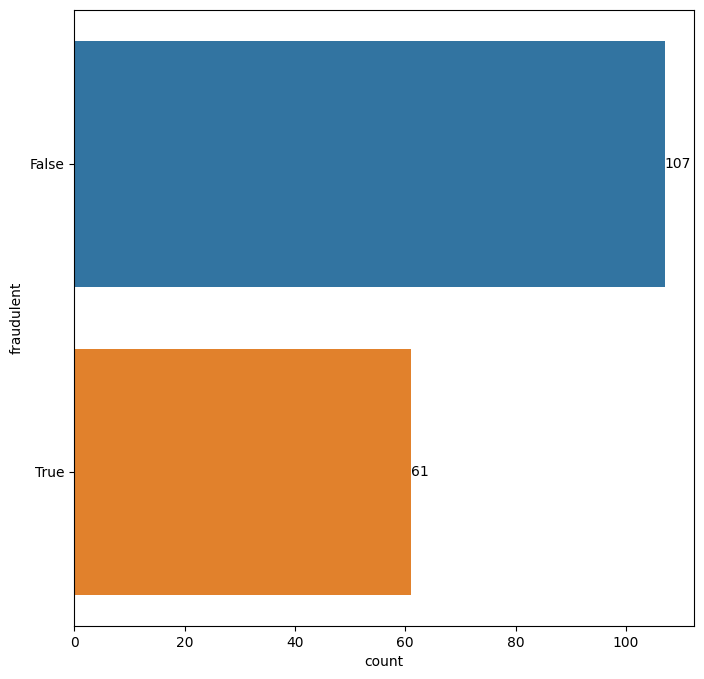

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
aux_fraudulent = sns.countplot(y=data['fraudulent'], order=data['fraudulent'].value_counts().index)

# el for sirve para colocar la cantidad en cada contenedor (barra)
for label in aux_fraudulent.containers:
    aux_fraudulent.bar_label(label)

plt.show()

Total de casos *(fraudulentos y no fraudulentos)*:

In [11]:
freq_tbl(data['fraudulent'])

,fraudulent,frequency,percentage,cumulative_perc
0,False,107,0.171750,0.636905
1,True,61,0.097913,1.000000


### 2) Análsis bivariado

2.A) Categorica vs categórica

Utilizamos el método 'crosstab' provisto por pandas:

In [12]:
pd.crosstab(data['fraudulent'], data['transactionFailed'], margins=True)

transactionFailed,False,True,All
fraudulent,,,
False,73,34,107
True,44,17,61
All,117,51,168


*_*Nota:*_ La interpretación de la tabla es la siguiente: Eje X -> transaction failed; Eje Y -> fraudulent.
Decimos entonces que 73 transacciones que fallaron NO son fraudulentas, mientras que 34 transacciones que fallaron SI son fraudulentas.
Tambíen decimos que 44 transacciones que fallaron SI eran fraudulentas y 17 transacciones que fallaron NO eran fraudulentas.

In [13]:
pd.crosstab(data.fraudulent, data.transactionFailed, normalize='index', margins=True)

transactionFailed,False,True
fraudulent,,
False,0.682243,0.317757
True,0.721311,0.278689
All,0.696429,0.303571


2.B) Numerica vs categorica

Para analizar dos variables, una categórica VS una numérica lo que debemos hacer es agrupar por categoria (groupby('var_categorica')) y establecer el promedio (puede ser otro parametro) para la variable numérica (en este caso 'transactionAmount')

In [14]:
data.groupby('fraudulent')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
fraudulent,,,,,,,,
False,107.0,33.373832,16.519584,10.0,20.5,33.0,44.5,75.0
True,61.0,30.950820,14.548111,10.0,19.0,29.0,42.0,69.0


**Nota:* Decimos entonces que el monto promedio entre transacciones fraudulentas y no-fraudulentas no varía significativamente aunque suelen ser un poco mas bajas las fraudulentas.

Si queremos ver unicamente el promedio de una categoría (agrupada por sus elementos) en concreto:


In [15]:
data.groupby('fraudulent')['transactionAmount'].mean()

fraudulent
False    33.373832
True     30.950820
Name: transactionAmount, dtype: float64

2.C) Numérica vs Numérica

In [16]:
data.groupby('orderAmount')['transactionAmount'].mean()

orderAmount
10.0     49.875000
11.0     37.466667
12.0     37.571429
13.0     30.500000
14.0     35.857143
           ...    
72.0     43.250000
73.0     22.500000
74.0     35.250000
75.0     33.000000
353.0    10.000000
Name: transactionAmount, Length: 67, dtype: float64

Promedio de todas las variables por la variable a predecir:

In [17]:
data.groupby('transactionAmount').mean(numeric_only=True)

,orderAmount,transactionFailed
transactionAmount,,
10,67.300000,0.272727
11,36.500000,0.300000
12,33.071429,0.391304
13,44.000000,0.000000
14,35.000000,0.458333
...,...,...
72,30.200000,0.400000
73,42.000000,0.000000
74,29.250000,0.250000


### 3) Graficos en AED

Numerica vs categorica

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

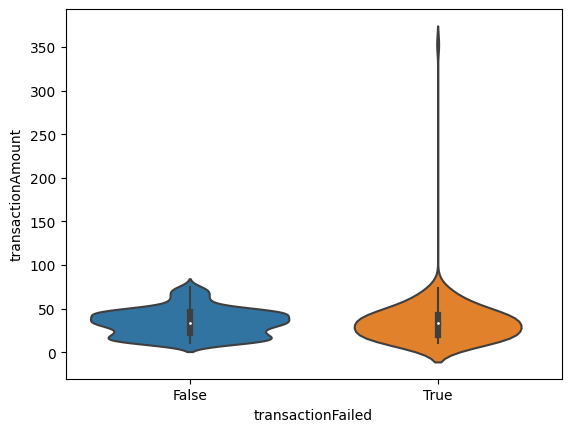

In [32]:
import seaborn as sns

sns.violinplot(y='transactionAmount', x='transactionFailed', data=data)

<Axes: xlabel='transactionFailed', ylabel='transactionAmount'>

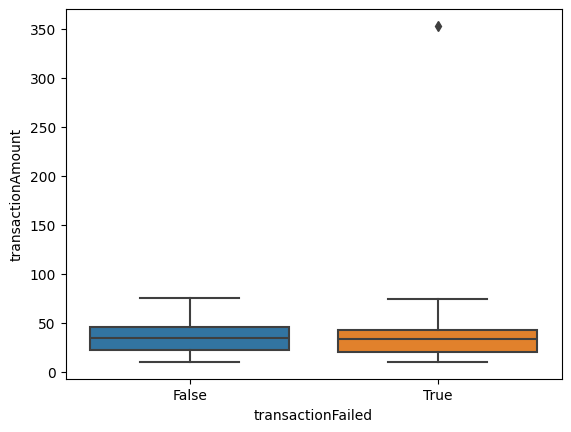

In [33]:
sns.boxplot(y='transactionAmount', x='transactionFailed', data=data)

Con el grafico anterior podemos observar un valor anómalo o muy alto respecto del conjunto de valores graficados. Vamos a recurir a realizar un histograma de la variable 'transactionAmount' para verificar que se trata de un outlier.

c:\Users\Dave\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Monto por transacción')

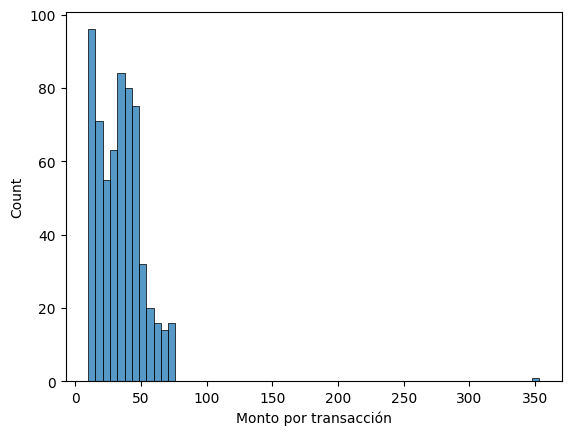

In [21]:
# Create a histogram using Seaborn
g = sns.histplot(data = data, x = 'transactionAmount')
# Add labels
g.set_xlabel('Monto por transacción')

Mediante una simple linea obtenemos el valor maximo de la variable y verificamos que coincida el valor del histograma:

In [28]:
data['transactionAmount'].max()

353

3.B) Categórica VS Categórica

Se divide en tres graficos. Cada uno pertenece a una categoria (pendiente, completo, falló) y en cada uno veremos las categorias asociadas con el metodo de pago.

Cabe mencionar que las variables categorias que hemos comparado son: 'paymentMethodType' y 'orderState'.

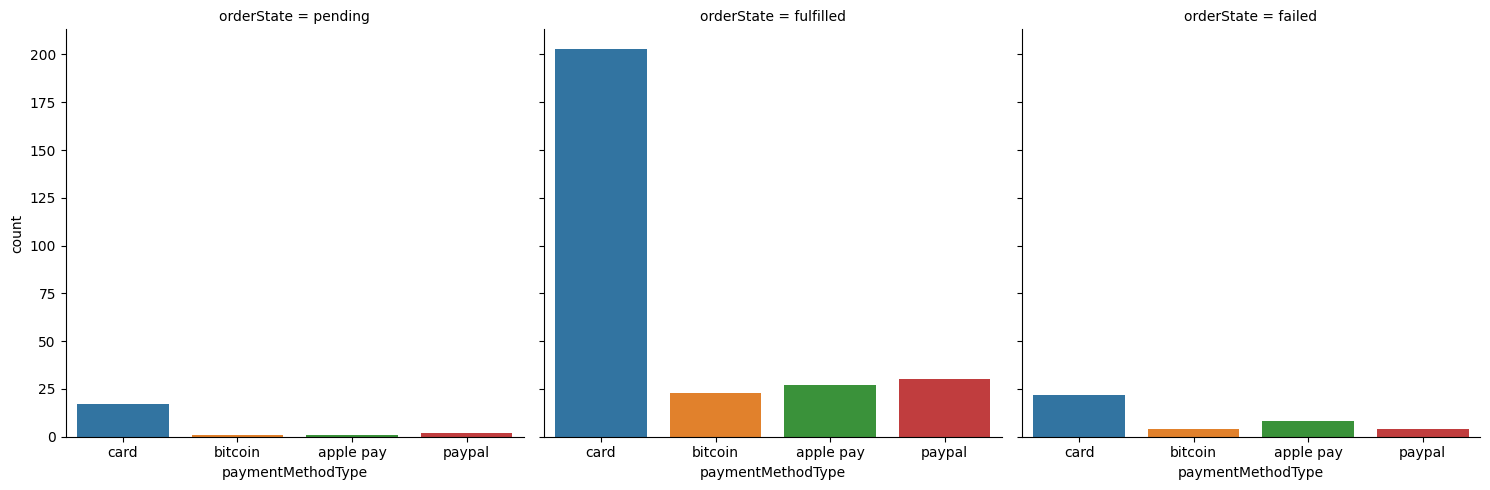

In [57]:
sns.catplot(x="paymentMethodType",
            col="orderState",
            data=data,
            kind="count")


In [59]:
data[['paymentMethodType','orderState']].value_counts()

paymentMethodType  orderState
card               fulfilled     203
paypal             fulfilled      30
apple pay          fulfilled      27
bitcoin            fulfilled      23
card               failed         22
                   pending        17
apple pay          failed          8
bitcoin            failed          4
paypal             failed          4
                   pending         2
apple pay          pending         1
bitcoin            pending         1
Name: count, dtype: int64

Nota, los valores anteriories suman el total de casos para cada estado

In [39]:
freq_tbl(data['paymentMethodType'])



,paymentMethodType,frequency,percentage,cumulative_perc
0,card,242,0.388443,0.707602
1,apple pay,36,0.057785,0.812865
2,paypal,36,0.057785,0.918129
3,bitcoin,28,0.044944,1.000000


No podemos decir que se usa mas tarjeta de credito porque tenemos un desbalanceo de los datos en cuanto al uso de metodos de pago

c:\Users\Dave\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Dave\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


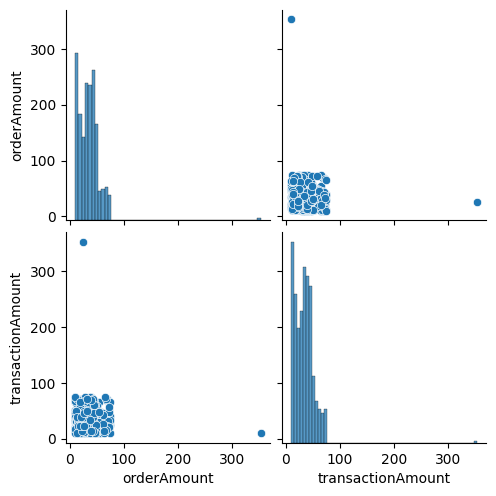

In [65]:
data_aux = data[["orderAmount", "transactionAmount"]].copy()

sns.pairplot(data_aux)

# 3) CORRELACIÓN

In [68]:
!pip install minepy

  Using cached minepy-1.2.6.tar.gz (496 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build minepy


  error: subprocess-exited-with-error
  
  × Building wheel for minepy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [9 lines of output]
      <string>:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-312\minepy
      copying minepy\__init__.py -> build\lib.win-amd64-cpython-312\minepy
      running build_ext
      building 'minepy.mine' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for minepy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (minepy)


In [69]:
from minepy import MINE

mine = MINE(alpha=0.6,c=15,est="mic_approx")

mine.mic()

ModuleNotFoundError: No module named 'minepy'